# Quest 04: 통계 기초

## 1. 통계 문제

### 문제 1) 
- 빵집에서는 매일 아침에 구워지는 식빵 한 개의 평균 무게가 500g이 되도록 맞추고자 합니다. 빵집 주인은 오늘 아침에 구운 식빵 중에서 랜덤하게 25개의 식빵을 샘플링하여 무게를 측정했습니다. 그 결과, 표본 평균은 495g, 표준편차는 10g으로 나왔습니다. 빵집 주인이 목표한 500g의 무게를 충족하고 있는지(다시말해 목표 무게를 넘는지 안 넘는지)  5% 유의수준에서 검정해보세요

In [3]:
import numpy as np
import pandas as pd
from scipy import stats as stats

- H0(귀무가설): 빵의 평균 무게는 목표 무게 500g과 같다.
- H1(대립가설): 빵의 평균 무게는 목표 무게 500g과 다르다.

In [36]:
# 데이터 설정
mu = 500  # 목표 평균 무게
n = 25  # 표본 크기
sample_mean = 495  # 표본 평균
sample_std = 10  # 표본 표준편차
alpha = 0.05  # 유의수준

# 표본이 작아 t검정, stats.ttest_1samp은 배열이 있을 때 사용
# 표준오차 계산
SE = sample_std / np.sqrt(n)

# t-통계량 계산
t_statistic = (sample_mean - mu) / SE

# 자유도_표본 계산이라 자유도 설정
df = n-1

# 양측 검정 p-value 계산 
p_value = 2 * stats.t.sf(abs(t_statistic), df)  # df 없으면 TypeError


# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.")
else:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")


t-값: -2.5000, p-value: 0.0197. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.


### 문제 2) 분포 시각화
문제 1번을 바탕으로 분포를 그리고 t통계량을 빨간색 점선으로, 초록색 점선으로 임계값을 기각역을 초록색으로 칠해보세요.

***기각역**:  통계량이 들어왔을 경우 귀무가설을 기각할 수 있는 영역을 말합니다.

 Hint)

- `plt.axvline` : y축 평행선 그리기
- `plt.fill_between` : 그래프 면적 색칠하기

Text(0.5, 1.0, 't-distribution')

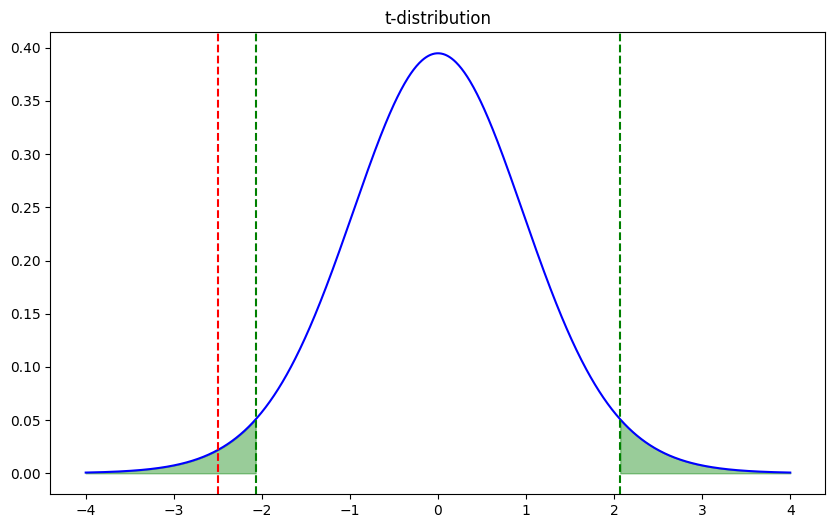

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# x축, y축
x = np.linspace(-4, 4, 1000)   # np.linspace: 지정된 간격에 걸쳐 균등하게 분포된 숫자 반환
y = stats.t.pdf(x, df)      # 각 x에 대한 t-분포의 확률 밀도 함수(PDF)

# 임계값
t_crit = stats.t.ppf(1 - alpha/2, df)  # stats.t.ppf: "누적 확률이 p가 되도록 하는 t값"을 구하는 함수

# 그래프
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue')

# t-통계량 선
plt.axvline(t_statistic, color='red', linestyle='--')

# 임계값 선
plt.axvline(-t_crit, color='green', linestyle='--')
plt.axvline(t_crit, color='green', linestyle='--')

# 기각역 칠하기
plt.fill_between(x, y, where=(x <= -t_crit), color='green', alpha=0.4)  # x 배열이 적으면 간격이 벌어져서 나타남 주의
plt.fill_between(x, y, where=(x >= t_crit), color='green', alpha=0.4)

plt.title('t-distribution')


### 문제 3) 단일 t표본 검정
- 어느 학교에서 새로운 교육 프로그램을 도입한 후 학생들의 수학 성적이 향상되었는지 확인하려고 합니다. 프로그램 도입 후 무작위로 선택한 16명의 학생들의 수학 성적 평균은 78점이고, 모집단의 평균은 75점입니다. 모집단의 표준편차는 알 수 없다고 합니다.
- 유의수준 0.05에서 이 교육 프로그램이 성적 향상에 효과가 있는지 단일 표본 t-검정을 실시하세요.

- H0(귀무가설): 교육프로그램은 효과가 없다.
- H1(대립가설): 교육프로그램은 효과가 있다.

In [35]:
sample_scores = [79, 77, 80, 76, 78, 81, 75, 79, 77, 80, 78, 76, 82, 77, 79, 78]  # 예시 데이터

# scipy.stats.ttest_1samp() 사용 

# 데이터
mu_0 = 75  # 모집단 평균
x_bar = 78  # 표본 평균
alpah = 0.05

# 단일 t표본 검정(양측 검정)
t_stat, p_value = stats.ttest_1samp(sample_scores, mu_0)   # alternative 기본값이 양측 검정

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 교육프로그램은 효과가 없습니다")



t-값: 6.7890, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.


### 문제 4) 독립 표본 t검정
- 한 연구소에서 두 가지 새로운 다이어트 프로그램의 효과를 비교하려고 합니다. 연구소는 두 그룹의 참가자들을 대상으로 12주간 다이어트 프로그램을 진행한 후 체중 감소량을 측정했습니다.
- 유의수준 5% 에서 두 그룹 간 평균 체중 감소량에 유의미한 차이가 있는지 독립 표본 t-검정을 실시하세요.

In [37]:
# 그룹 A와 B의 체중 감소량 데이터
group_A = [5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2]
group_B = [4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3]

In [ ]:
# 1. 등분산 검정
# H0(귀무가설): 두 집단은 등분산이다.
# H1(대립가설): 두 집단은 등분산이 아니다. => 이분산

# scipy.stats.levene(sample): sample1, sample2, ... 등분산에 대한 검정(1차원 샘플만 가능) / statistic과 p-value 결과값 반환
stat_levene, pvalue_levene = stats.levene(group_A, group_B)
print(f'등분산 검정 통계량: {stat_levene:.2f}, 등분산 검정 p-value: {pvalue_levene:.2f}')

등분산 검정 통계량: 1.29, 등분산 검정 p-value: 0.27


- H0(귀무가설): 새로운 다이어트 프로그램은 효과가 없다.
- H1(대립가설): 새로운 다이어트 프로그램은 효과가 있다.

In [42]:
# 2. 등분산 검정 결과에 따른 t검정 eqaul_var 매개변수 값 입력
eqaual_var = pvalue_levene >= 0.05  # 0.05이상이면 등분산이고 True


# 3. 독립 표본 t검정
t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=eqaual_var)  # equal_var는 기본값은 True인데, False로 지정하는 경우 자동으로 Welch t-test 시행

# 결과 출력
alpha = 0.05
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 다이어트 프로그램은 효과가 없습니다")

t-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.


### 문제 5) 대응표본 t검정
- 운동 프로그램 전후의 체중 변화를 분석하기 위해 10명의 참가자의 체중을 측정했습니다. 유의수준 5%에서 운동 프로그램이 체중 감소에 효과가 있는지 **대응 표본 t-검정**을 실시하세요.
- 또한, 대응표본t검정에서 등분산 검정이 필요한지 고민해봅시다.

- H0(귀무가설): 운동 프로그램은 체중 감소에 효과가 없다.
- H1(대립가설): 운동 프로그램은 체중 감소에 효과가 있다.

In [ ]:
# 대응표본 t검정은 Paired T-test
# 짝지어진 두 집단의 '차이값'을 계산하고, 그 차이값들의 평균 등을 검정하므로 두 집단의 분산이 동일할 필요 X

# scipy.stats.ttest_rel(a, b): 두 개의 관련있거나 반복 샘플이 동일한 평균 기대값을 갖는다는 귀무가설(H0)을 검정

# 운동 전후 체중 데이터
before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])

# 대응표본 t-검정
t_stat, p_value = stats.ttest_rel(before, after)

# 결과 출력
alpha = 0.05
if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 운동 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 운동 프로그램은 효과가 없습니다.")



t-값: 9.0000, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 운동 프로그램은 효과가 있습니다.


### 문제 6) 표본 추출
- Quest 05-01의  Online Retail II 데이터에서 표본을 추출하여 모집단의 평균을 추정해보세요.
- 영국(United Kingdom)에서 주문된 데이터 에서 30개, 100개, 300개의 샘플을 무작위 추출하여 평균 구매 금액(Total Price)를 계산해보세요. 표본의 크기가 커질 수록 모집단의 평균과 가까워지는지 확인해보세요.
- 데이터 불러오는 코드 & 예상결과

In [44]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Path to dataset files:", path)
retail = pd.read_csv(path + '/' + os.listdir(path)[0])
retail.head(3)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 14.5M/14.5M [00:15<00:00, 955kB/s] 

Extracting files...


Path to dataset files: /Users/chaeseunghee/.cache/kagglehub/datasets/mashlyn/online-retail-ii-uci/versions/3


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [72]:
# 1. 영국에서 주문된 데이터만 사용
uk_retail = retail[retail['Country'] == 'United Kingdom'].copy()  # SettingWithCopyWarning

In [73]:
# uk_retail.info()
# uk_retail.head()
uk_retail['Country'].unique()

array(['United Kingdom'], dtype=object)

In [74]:
# 2. 구매 금액(TotalPrice) 계산하여 컬럼 생성
uk_retail['TotalPrice'] = uk_retail['Quantity'] * uk_retail['Price']
uk_retail.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0


In [102]:
# 3. 모집단 평균 구해놓기
mu_0 = uk_retail['TotalPrice'].mean()
print(f'모집단의 평균 TotalPrice: {mu_0:.2f}')

# 4. 표본 추출과 크기별 평균
sample_sizes = [30, 100, 300]
for n in sample_sizes:
    sample = uk_retail['TotalPrice'].sample(n=n)  # pd.DataFrame.sample이 Series나 DataFrame에서 무작위로 샘플을 반환하는 것에 적합. np.random.choice는 주어진 1차원 배열에서 샘플 추출에 적합
    sample_mean = sample.mean()
    print(f'Sample size: {n}, Mean TotalPrice: {sample_mean:.2f}')

모집단의 평균 TotalPrice: 16.69
Sample size: 30, Mean TotalPrice: 11.30
Sample size: 100, Mean TotalPrice: 20.48
Sample size: 300, Mean TotalPrice: 19.14


### 문제 7) 신뢰구간
- 영국 데이터에서 TotalPrice를 사용하여 95% 신뢰 구간을 계산하세요. 또한 표본의 크기가 30,100, 300으로 변하면서 신뢰구간이 변하는 형태를 확인해 보세요.

In [ ]:
import scipy.stats as stats

# 신뢰 구간 계산 함수 
# stats.t.interval(confidence_level, df, loc=mean, scale=std_err)
def confidence_interval(data, confidence=0.95):
    mean = data.mean()
    std_err = stats.sem(data)
    interval = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)  # 신뢰수준에 해당하는 구간(하한, 상한) 반환
    return mean, interval

# 샘플 크기에 따른 신뢰 구간 비교
sample_sizes = [30, 100, 300]
for size in sample_sizes:
    sample = uk_retail['TotalPrice'].sample(size, random_state=42)
    mean, interval = confidence_interval(sample)
    print(f'Sample size: {size}, Mean: {mean:.2f}, 95% CI: {interval}')

Sample size: 30, Mean: 11.88, 95% CI: (np.float64(6.378414660906579), np.float64(17.38425200576009))
Sample size: 100, Mean: 16.09, 95% CI: (np.float64(11.142955150004974), np.float64(21.02784484999502))
Sample size: 300, Mean: 13.34, 95% CI: (np.float64(11.264027626023802), np.float64(15.424439040642865))


### 문제 8) 가설검정 t-test
- 영국과 독일의 고객의 평균 구매금액(Total Price)가 동일한지 검정해보세요. 귀무가설과 대립가설을 세우고 통계검정을 통해 결과를 해석하세요
- 영국과 독일의 분포는 등분산성은 따른다고 가정

- H0(귀무가설): 영국과 독일 고객의 평균 구매 금액은 같다.
- H1(대립가설): 영국과 독일 고객의 평균 구매 금액에는 차이가 있다.

In [108]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [109]:
retail['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland', 'Saudi Arabia',
       'Czech Republic', 'European Community'], dtype=object)

In [110]:
# 1. retail에 TotalPrice 생성한 후, 국가별로 데이터 추출
retail['TotalPrice'] = retail['Quantity'] * retail['Price']

uk = retail[retail['Country'] == 'United Kingdom']
gm = retail[retail['Country'] == 'Germany']

# 2. 독립표본 t-검정 (두 국가의 평균이 같은지를 봐야 하므로 양측 검정)
t_stat, p_value = stats.ttest_ind(uk['TotalPrice'], gm['TotalPrice'], equal_var=True)

# 3. 결과 출력
print(f't-통계량: {t_stat:.2f}, p-value: {p_value:.2f}')
if p_value < 0.05:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.")
else:
    print("영국과 독일 고객의 평균 구매 금액에 유의한 차이가 없습니다.")

t-통계량: -3.08, p-value: 0.00
영국과 독일 고객의 평균 구매 금액에 유의한 차이가 있습니다.


## 2. A/B 테스트

#### 가설
- H0(귀무가설): A와 B 페이지의 상품 판매 효율(구매 전환율)은 같다.
- H1(대립가설): B 페이지의 구매 전환율이 A 페이지보다 높다.
#### 테스트 결과
- 페이지 A: 구매 전환율 = 8% (노출 수: 1000, 구매 수: 80)
- 페이지 B: 구매 전환율 = 11% (노출 수: 200, 구매 수: 22)

In [126]:
import statsmodels.stats.api as sms
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

# 테스트 결과 데이터

# 양측 검정은 전환율이 '같다/다르다' 정도만 검정
nobs = [1000, 200]     # 각 그룹의 표본 크기
successes = [80, 22]   # 성공(구매 전환) 수

# 효과 크기
effect_size = sms.proportion_effectsize(0.08, 0.11)

# z-test
z_stat, pval = proportions_ztest(successes, nobs=nobs)

# 전환율 신뢰구간
(lower_A, lower_B), (upper_A, upper_B) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'effect size: {effect_size}')
print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'95% Confidence interval for A: [{lower_A:.3f}, {upper_A:.3f}]')
print(f'95% Confidence interval for B: [{lower_B:.3f}, {upper_B:.3f}]')

effect size: -0.10261740513756457
z statistic: -1.39
p-value: 0.165
95% Confidence interval for A: [0.063, 0.097]
95% Confidence interval for B: [0.067, 0.153]


In [125]:
# 단측 검정 (B가 A보다 높다니까 단측 검정 시행해보기)

nobs = [200, 1000]   # 실험군이 먼저
successes = [22, 80]

# 효과 크기
effect_size = sms.proportion_effectsize(0.11, 0.08)

# 단측 z-test
z_stat, pval = proportions_ztest(count=successes, nobs=nobs, alternative='larger') # 단측 우측 검정하는 값(실험군이 대조군보다 크다)

# 전환율 신뢰구간
(lower_B, lower_A), (upper_B, upper_A) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'effect size: {effect_size}')
print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'95% Confidence interval for A: [{lower_A:.3f}, {upper_A:.3f}]')
print(f'95% Confidence interval for B: [{lower_B:.3f}, {upper_B:.3f}]')

effect size: 0.10261740513756457
z statistic: 1.39
p-value: 0.082
95% Confidence interval for A: [0.063, 0.097]
95% Confidence interval for B: [0.067, 0.153]


### 문제 9)
- 결과를 바탕으로 패키지 기획자는 페이지 B의 효과에 대해 어떤 결정을 해야 할지 서술해 주세요. 

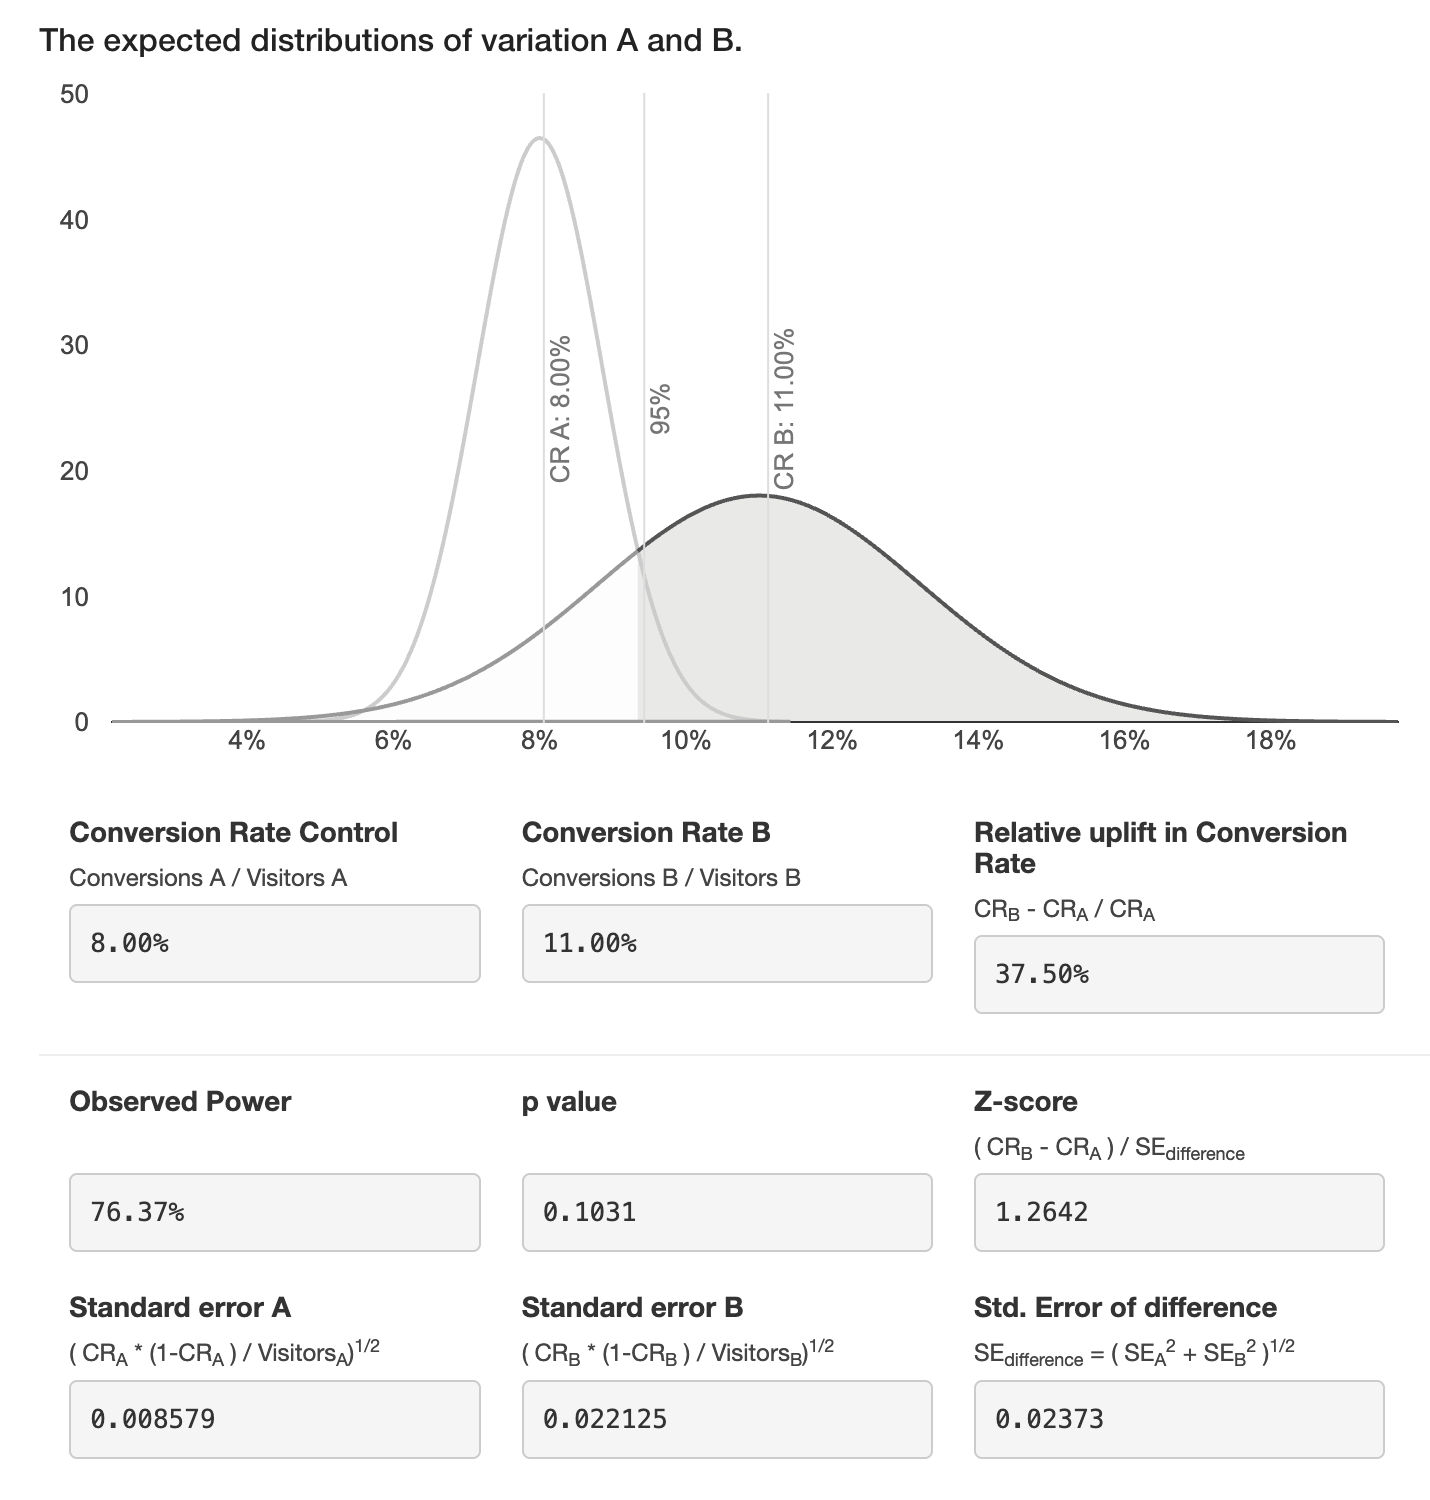

- 결과 요약
    - 전환율은 8%(A) -> 11%(B)로, 상대적으로 37.5% 개선된 수치
    - 그러나 p-value는 0.1031 > 0.05(유의수준) 보다 큰 값으로, 두 페이지의 상품 구매 전환율은 통계적으로 유의미한 차이를 보이지 않았다.
    - 현재 통계적으로 페이지 B의 상품 판매 효율이 페이지 A 대비 효과가 높다고 보기 어렵다.

- 효과에 대한 의사 결정 방향
    - 통계정 유의성은 유의미한 차이가 없으나, 전환율 상승이 있으므로 실질적인 유의성이 있는지도 고려해볼 필요가 있다.
    - 페이지 A는 1,000건이 노출된 반면, 페이지 B는 노출 수가 200건으로 상대적으로 적다.
    - 페이지 B의 노출 수를 증가시켜 더 많은 데이터를 수집한 후, 추가적으로 A/B 테스트를 진행하는 것이 필요하다.

### 문제 10)
- A/B 테스트의 결과가 통계적으로 유의하나 효과의 차이 자체는 매우 작은 경우, 어떤 의사결정을 할 수 있을지 사례를 통해 설명해 주세요.

- 사례 예시_참고)https://yozm.wishket.com/magazine/detail/897/
    - 예를 들어, 인터넷 쇼핑몰에서 기존 페이지네이션 방식(A)과 무한 스크롤 방식(B)을 도입한 웹사이트에 대한 구매 전환율 A/B 테스트를 진행했다고 보았다.
    - 테스트 결과, 구매 전환율에 대한 p-value가 0.03으로 유의미하지만 효과의 크기는 0.1로 작은 차이가 나타났다.
    - 이러한 경우에는 B가 A보다 무조건 효과적이라고 결론짓기 보다는 전환율 차이가 실제 비즈니스에 유의미한 영향을 줄 만큼 차이가 있는지 판단이 필요하다. 

- 의사결정 고려사항
    - 개발 및 디자인 비용
        - 무한 스크롤 방식(B)을 전면적으로 적용하기 위해서 단순한 UI 변경뿐 아니라 로딩 최적화, API, 모바일 반응형 등 다양한 개발 리소스를 고려해야 한다.
        - 또한, 새로 개발한 방식에 대한 유지보수 및 기술적인 이슈는 없을지 파악해야 한다.
    - 사용자 경험(고객 편의성)
        - 상품 수가 많아질수록 고객에게 상품 재탐색이나 카테고리 파악 등에 있어서 불편함이 있을 수 있다.
        - 단기 전환율이 아니라 장기적인 측면에서 고객 만족도 등을 고려해야 한다.
    - 따라서 A/B 테스트의 결과가 통계적으로는 유의하나 효과 차이 자체는 작을 경우, 작은 개선에 대한 투자 대비 이익이 얼마나 될지, 장기적으로 의미가 있을지 등을 종합적으로 살펴보고 의사결정을 내려야 한다고 생각한다.

## 회고

##### K
- 단순히 문제에 적혀있는 검정의 함수와 식을 사용하는 것이 아니라, 주어진 문제&상황에 따라 어떠한 통계 검정 방법이 적합한지를 파악하고 이해하면서 문제를 풀었다.
- 모듈, 함수에 대한 공식 문서를 보면서 필요한 인자들에 대해 이해하려고 노력했다.

##### P
- 강의자료의 관련된 부분을 참고하지 않고서는 아직 처음부터 끝까지 모든 과정의 코드를 쓰기 어렵다.
- 반복문과 함수 생성 구문이 특히나 거리감이 느껴진다..

##### T
- 코드 필사도 해보면서 코드를 이해하고 손에 익혀야겠다.
- 제공해주신 참고 사이트 등 추가적인 이슈나 상식을 읽으며 배경지식도 다양하게 쌓으면 좋을 것 같다.

